In [78]:
import pandas as pd
import glob as  g
import missingno as msno
import seaborn as sns

In [3]:
help(g)

Help on module glob:

NAME
    glob - Filename globbing utility.

FUNCTIONS
    escape(pathname)
        Escape all special characters.
    
    glob(pathname, *, recursive=False)
        Return a list of paths matching a pathname pattern.
        
        The pattern may contain simple shell-style wildcards a la
        fnmatch. However, unlike fnmatch, filenames starting with a
        dot are special cases that are not matched by '*' and '?'
        patterns.
        
        If recursive is true, the pattern '**' will match any files and
        zero or more directories and subdirectories.
    
    iglob(pathname, *, recursive=False)
        Return an iterator which yields the paths matching a pathname pattern.
        
        The pattern may contain simple shell-style wildcards a la
        fnmatch. However, unlike fnmatch, filenames starting with a
        dot are special cases that are not matched by '*' and '?'
        patterns.
        
        If recursive is true, the patte

In [9]:
files = g.glob('../data/*.csv')

In [10]:
files

['../data/May 2019.csv',
 '../data/July 2019.csv',
 '../data/2007.csv',
 '../data/1999.csv',
 '../data/2014.csv',
 '../data/February 2019.csv',
 '../data/2002.csv',
 '../data/2009.csv',
 '../data/August 2019.csv',
 '../data/2008.csv',
 '../data/2004.csv',
 '../data/April 2019.csv',
 '../data/March 2019.csv',
 '../data/2012.csv',
 '../data/2010.csv',
 '../data/2015.csv',
 '../data/2006.csv',
 '../data/2013.csv',
 '../data/2017.csv',
 '../data/2016.csv',
 '../data/2011.csv',
 '../data/2018.csv',
 '../data/2001.csv',
 '../data/2005.csv',
 '../data/January 2019.csv',
 '../data/2000.csv',
 '../data/June 2019.csv',
 '../data/2003.csv']

In [13]:
df = pd.read_csv(files[0], names = ['symbol', 'date', 'open', 'high', 'low', 'close', 'volume'])

In [23]:
columns = ['symbol', 'date', 'open', 'high', 'low', 'close', 'volume']
df_all = pd.DataFrame(columns = columns)

In [30]:
files = g.glob('../data/*.csv')
columns = ['symbol', 'date', 'open', 'high', 'low', 'close', 'volume']
df_all = pd.DataFrame(columns = columns)
i = 0
for file in files:
    i += 1
    df = pd.read_csv(file, names = ['symbol', 'date', 'open', 'high', 'low', 'close', 'volume'])
    df_all = pd.concat([df_all, df])
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [31]:
df_all.head()

,symbol,date,open,high,low,close,volume
0,00DS30,02-05-2019,1846.67,1875.75,1846.67,1870.58,4.753e+07
1,00DS30,05-05-2019,1870.58,1903.53,1870.58,1901.66,5.35959e+07
2,00DS30,06-05-2019,1901.66,1907.48,1879.36,1881.21,4.67345e+07
3,00DS30,07-05-2019,1881.21,1886.95,1858.92,1861.82,4.33506e+07
4,00DS30,08-05-2019,1861.82,1868.76,1852.75,1858.05,3.31784e+07


In [32]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995836 entries, 0 to 19586
Data columns (total 7 columns):
symbol    995836 non-null object
date      995836 non-null object
open      995836 non-null float64
high      995836 non-null float64
low       995836 non-null object
close     995836 non-null float64
volume    995835 non-null object
dtypes: float64(3), object(4)
memory usage: 60.8+ MB


In [34]:
df_all = df_all.set_index(pd.to_datetime(df_all['date'], format = "%d-%m-%Y"))

In [35]:
df_all.head()

,symbol,date,open,high,low,close,volume
date,,,,,,,
2019-05-02,00DS30,02-05-2019,1846.67,1875.75,1846.67,1870.58,4.753e+07
2019-05-05,00DS30,05-05-2019,1870.58,1903.53,1870.58,1901.66,5.35959e+07
2019-05-06,00DS30,06-05-2019,1901.66,1907.48,1879.36,1881.21,4.67345e+07
2019-05-07,00DS30,07-05-2019,1881.21,1886.95,1858.92,1861.82,4.33506e+07
2019-05-08,00DS30,08-05-2019,1861.82,1868.76,1852.75,1858.05,3.31784e+07


In [37]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 995836 entries, 2019-05-02 to 2003-12-30
Data columns (total 7 columns):
symbol    995836 non-null object
date      995836 non-null object
open      995836 non-null float64
high      995836 non-null float64
low       995836 non-null object
close     995836 non-null float64
volume    995835 non-null object
dtypes: float64(3), object(4)
memory usage: 60.8+ MB


In [50]:
df_dse30 = df_all[df_all['symbol'] == "00DSEGEN"]

In [41]:
df_dse30.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1130 entries, 2019-05-02 to 2019-06-30
Data columns (total 7 columns):
symbol    1130 non-null object
date      1130 non-null object
open      1130 non-null float64
high      1130 non-null float64
low       1130 non-null object
close     1130 non-null float64
volume    1130 non-null object
dtypes: float64(3), object(4)
memory usage: 70.6+ KB


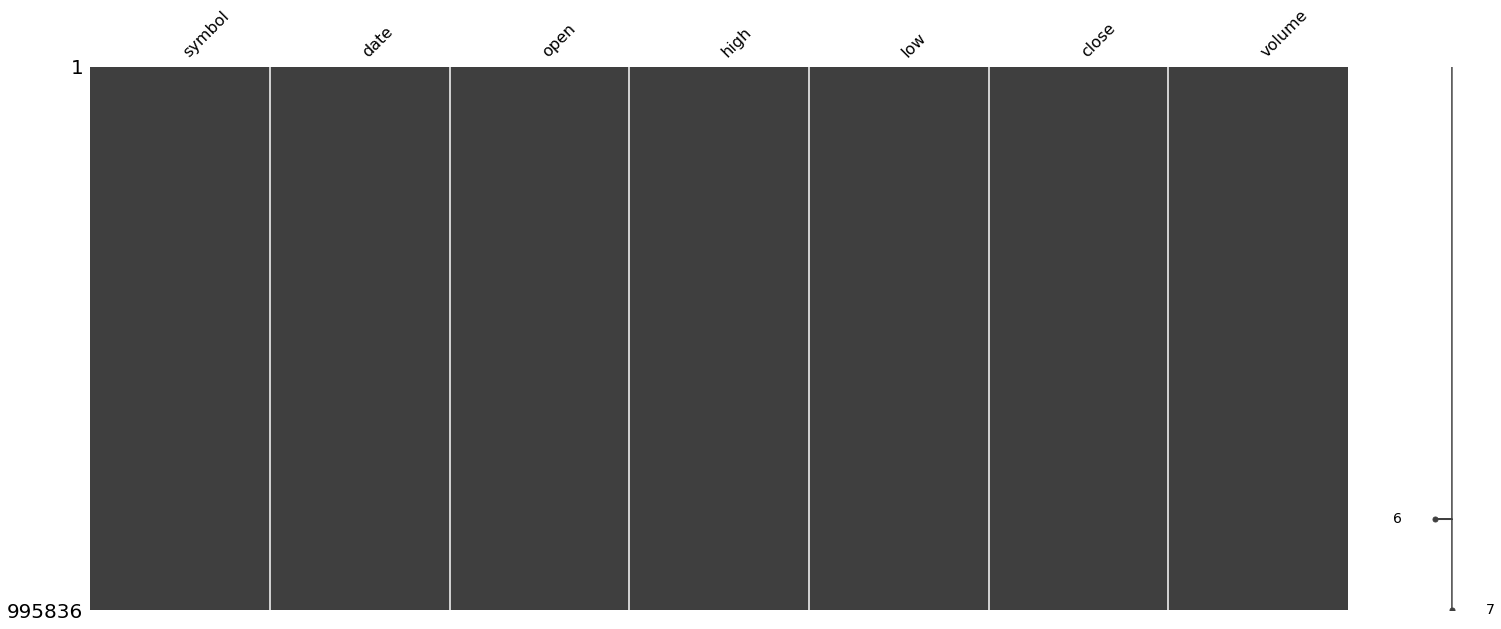

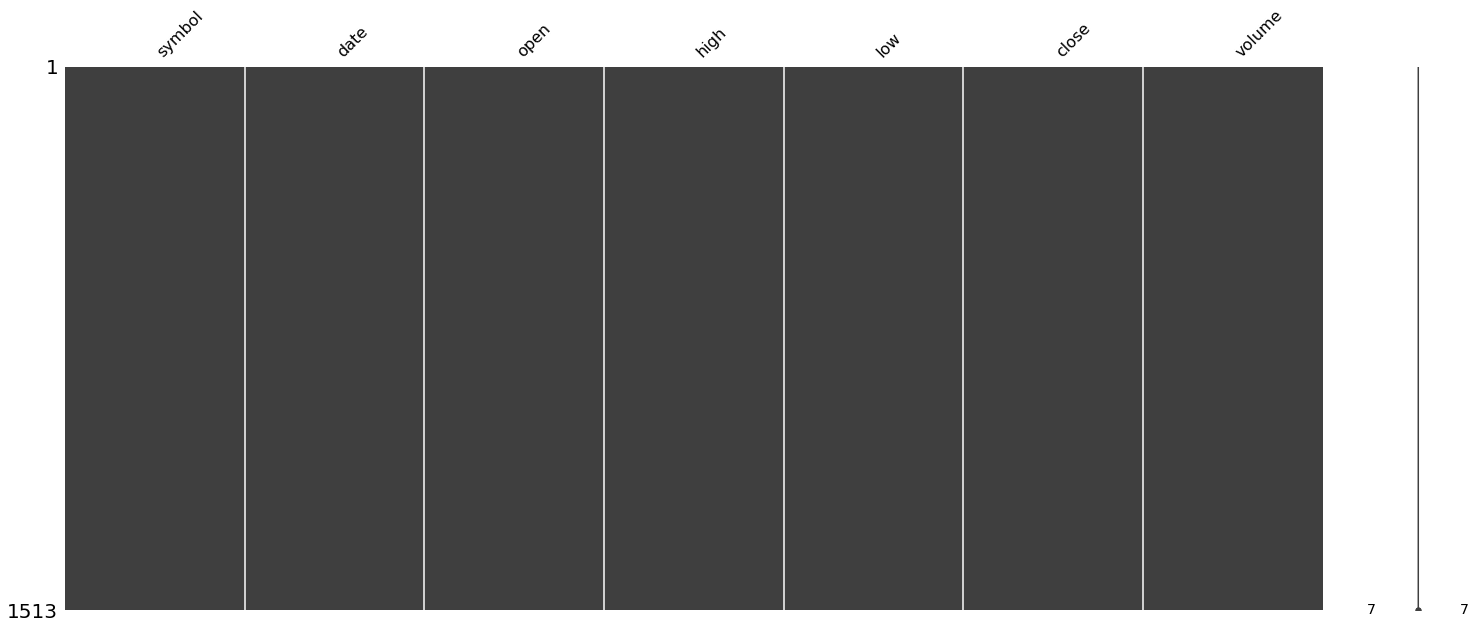

In [51]:
msno.matrix(df_all)
msno.matrix(df_dse30)

In [46]:
len(df_all['symbol'].unique())

494

In [47]:
df_all['symbol'].unique()

array(['00DS30', '00DSES', '00DSEX', '01.Bank', '02.Cement',
       '03.Ceramics_Sector', '04.Engineering',
       '05.Financial_Institutions', '06.Food_&_Allied', '07.Fuel_&_Power',
       '08.Insurance', '09.IT_Sector', '10.Jute', '11.Miscellaneous',
       '12.Mutual_Funds', '13.Paper_&_Printing',
       '14.Pharmaceuticals_&_Chemicals', '15.Services_&_Real_Estate',
       '16.Tannery_Industries', '17.Telecommunication', '18.Textile',
       '19.Travel_&_Leisure', '1JANATAMF', '1STPRIMFMF', '20.Bond',
       'AAMRANET', 'AAMRATECH', 'ABB1STMF', 'ABBANK', 'ACFL', 'ACI',
       'ACIFORMULA', 'ACMELAB', 'ACTIVEFINE', 'ADVENT', 'AFCAGRO',
       'AFTABAUTO', 'AGNISYSL', 'AGRANINS', 'AIBL1STIMF', 'AIL',
       'ALARABANK', 'AL-HAJTEX', 'ALIF', 'ALLTEX', 'AMANFEED', 'AMBEEPHA',
       'AMCL(PRAN)', 'ANLIMAYARN', 'ANWARGALV', 'APEXFOODS', 'APEXFOOT',
       'APEXSPINN', 'APEXTANRY', 'APOLOISPAT', 'ARAMIT', 'ARAMITCEM',
       'ARGONDENIM', 'ASIAINS', 'ASIAPACINS', 'ATCSLGF', 'ATLASBANG',
 

In [48]:
df = df_all['2008-01-01':'2008-01-03']

In [49]:
df.head()

,symbol,date,open,high,low,close,volume
date,,,,,,,
2008-01-01,00DSEGEN,01-01-2008,3044.00,3048.00,3005,3008.91,1.32037e+07
2008-01-02,00DSEGEN,02-01-2008,3007.00,3008.91,2956.67,2959.36,1.16743e+07
2008-01-03,00DSEGEN,03-01-2008,2960.50,2981.57,2929.31,2979.48,1.13184e+07
2008-01-01,1STBSRS,01-01-2008,620.25,628.00,615.25,619.00,0
2008-01-02,1STBSRS,02-01-2008,613.50,617.50,607,612.75,0


In [52]:
df_dse30.head()

,symbol,date,open,high,low,close,volume
date,,,,,,,
2007-01-03,00DSEGEN,03-01-2007,1609.0,1609.0,1583,1583.0,3.24546e+06
2007-01-04,00DSEGEN,04-01-2007,1583.0,1589.4,1583,1589.4,2.99359e+06
2007-01-07,00DSEGEN,07-01-2007,1589.0,1589.0,1574.9,1574.9,2.33174e+06
2007-01-08,00DSEGEN,08-01-2007,1574.0,1579.2,1574,1579.2,4.29005e+06
2007-01-09,00DSEGEN,09-01-2007,1579.0,1588.0,1579,1588.0,3.70896e+06


In [54]:
df_all['date'].unique()

array(['02-05-2019', '05-05-2019', '06-05-2019', ..., '24-12-2003',
       '28-12-2003', '03-01-2003'], dtype=object)

In [56]:
df_all = df_all.drop('date', axis=1)

In [57]:
df_all.head()

,symbol,open,high,low,close,volume
date,,,,,,
2019-05-02,00DS30,1846.67,1875.75,1846.67,1870.58,4.753e+07
2019-05-05,00DS30,1870.58,1903.53,1870.58,1901.66,5.35959e+07
2019-05-06,00DS30,1901.66,1907.48,1879.36,1881.21,4.67345e+07
2019-05-07,00DS30,1881.21,1886.95,1858.92,1861.82,4.33506e+07
2019-05-08,00DS30,1861.82,1868.76,1852.75,1858.05,3.31784e+07


In [65]:
len(df_all['2015-01-01':'2015-12-31'].index.unique())


244

In [66]:
df_now = df_all[df_all['symbol'] == 'MTB']

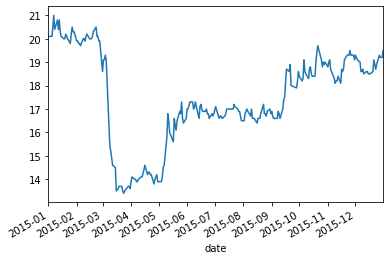

In [77]:
df_now['2015-01-01':'2016-01-01']['close']

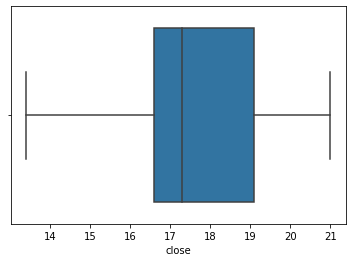

In [79]:
sns.boxplot(df_now['2015-01-01':'2016-01-01']['close'])